<a href="https://colab.research.google.com/github/joalissoncm/UFC_Data_Analysis/blob/main/An%C3%A1lise_de_Dados_UFC_Lutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

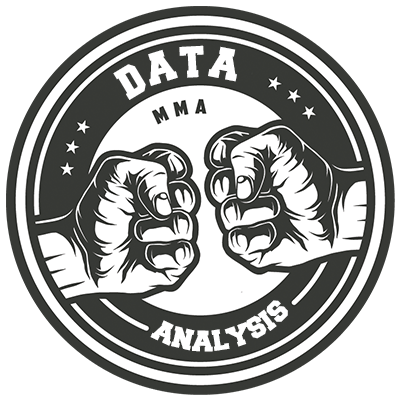

#**Análise de Dados - UFC Lutas**

[![LinkedIn](https://img.shields.io/badge/LinkedIn-joalissoncmoreira-blue.svg)](https://www.linkedin.com/in/joalisson-da-costa-moreira-12119b220/)
[![GitHub](https://img.shields.io/badge/GitHub-joalissoncm-purple.svg)](https://github.com/joalissoncm)

O intuito deste projeto é realizar **análises estatísticas** para ajudar na compreensão do modelo de negócios do UFC e as principais diferenças entre as categorias de peso.

# Referências

Existem análises feitas de outro esporte como o basquete, feitas com técnicas semelhantes a deste trabalho. Se você gosta de basquete pode ver a análise do **Rafael Duarte** neste [link.](https://github.com/rafaelnduarte/Analise_De_Dados_Cerrado_Basquete)

Os dados utilizados neste projeto foram disponibilizados no [Kaggle](https://www.kaggle.com/mdabbert/ultimate-ufc-dataset?select=ufc-master.csv/), e contém todas as lutas da história do UFC.




## Diferencial

Um importante diferencial neste trabalho de análise de dados, é o meu background com o MMA que me faz identificar correlações que vão além do óbvio, como por exemplo, a correlação entre golpes significativos e vitórias ou takedowns aplicados e derrotas.

O diferencial de um par de olhos extra analisando os dados, bem como técnicas estatísticas, ajudam muito a entender as particularidades desse esporte tão jovem.

## **Análise dos dados**

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
#Visualizando os dados. Como você pode ver o trabalho de registrar todas as lutas foi bem feito.
pd.read_csv("https://raw.githubusercontent.com/joalissoncm/UFC_Data_Analysis/main/datasets/ufc-master.csv")

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,...,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Alexander Volkanovski,Brian Ortega,-180.0,155,55.555556,155.0,2021-09-25,"Las Vegas, Nevada, USA",USA,Red,True,Featherweight,MALE,5,0,1,0,4.150000,0.38,1.200000,0.870000,0.24,6,1,25,1,0,0,1,3,3,0,7,Switch,172.72,175.26,145,0,9,0,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,140.0,500.0,1600.0,400.0,250.0,700.0
1,Valentina Shevchenko,Lauren Murphy,-1375.0,800,7.272727,800.0,2021-09-25,"Las Vegas, Nevada, USA",USA,Red,True,Women's Flyweight,FEMALE,5,0,5,0,3.580000,0.38,0.100000,1.030000,0.34,5,4,32,0,0,3,1,2,1,0,7,Orthodox,165.10,170.18,125,0,7,0,...,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Red,KO/TKO,Punches,4.0,4:00,1140.0,200.0,1800.0,350.0,2800.0,-110.0,2500.0
2,Nick Diaz,Robbie Lawler,140.0,-160,140.000000,62.5,2021-09-25,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,4,0,0,3.730000,0.46,0.000000,0.660000,0.64,5,14,91,5,0,3,4,12,0,0,19,Southpaw,180.34,187.96,170,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,KO/TKO,Punch,3.0,0:44,644.0,275.0,225.0,800.0,2500.0,650.0,185.0
3,Curtis Blaydes,Jairzinho Rozenstruik,-380.0,290,26.315789,290.0,2021-09-25,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,3,0,1,0,2.800000,0.46,0.000000,0.000000,0.00,4,2,18,0,0,0,0,6,0,0,6,Orthodox,187.96,198.12,242,1,0,0,...,6.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,3.0,5:00,900.0,180.0,1000.0,1000.0,3500.0,125.0,380.0
4,Jessica Andrade,Cynthia Calvillo,-220.0,180,45.454545,180.0,2021-09-25,"Las Vegas, Nevada, USA",USA,Red,False,Women's Flyweight,FEMALE,3,1,0,1,4.240000,0.41,1.100000,1.770000,0.44,3,2,25,0,0,0,3,0,3,0,6,Orthodox,162.56,162.56,125,1,0,0,...,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,KO/TKO,Punches,1.0,4:54,294.0,140.0,330.0,1000.0,900.0,225.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,Duane Ludwig,Darren Elkins,-155.0,135,64.516129,135.0,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,3,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,Orthodox,177.80,180.34,145,1

In [3]:
champs = pd.read_csv("https://raw.githubusercontent.com/joalissoncm/UFC_Data_Analysis/main/datasets/ufc-master.csv")

In [4]:
champs.shape

(4885, 119)

In [5]:
print("Duplicated values: ", champs.duplicated().sum())

Duplicated values:  0


#### Dicionário de variáveis

Abaixo, temos o significado das **principais variáveis** apresentada no dataset analisado:

* R_fighter - Red Fighter (Lutador favorito)
* B_fighter - Blue Fighter (Lutador azarão)
* weight_class - Categoria de peso
* title_bout - Dispustas por cinturão
* B_avg_SIG_STR_landed - Média dos golpes significativos aterrizados
* B_avg_SIG_STR_pct - Porcentagem dos golpes significativos aterrizados
* B_avg_SUB_ATT - Média das tentativas de submissão
* B_avg_TD_landed - Média de takedowns aplicados
* B_avg_TD_pct - Porcentagem de takedowns aplicados
* B_longest_win_streak - Sequência de vitorias mais loga do azarão
* B_total_title_bouts - Total de disputas por cinturão


In [6]:
#Se você ficou curioso para saber todas as colunas
champs.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds'],
      dtype='object', length=119)

#### Limpeza
É importante sempre verificar se existem algum dado nulo porque isso pode gerar resultados incoerentes no final.
Para verificar se temos dados nulos usamos a função "info( )"

In [7]:
champs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4885 entries, 0 to 4884
Columns: 119 entries, R_fighter to b_ko_odds
dtypes: bool(1), float64(58), int64(46), object(14)
memory usage: 4.4+ MB


**Para este projeto não vamos analisar os dados sobre as apostas, vamos focar mais nos méritos esportivos dos lutadores.**

In [8]:
# Então vamos remover todas as colunas com dados de apostas.
champs = champs.drop(columns=['R_odds', 'B_odds', 'R_ev', 'B_ev', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds'])

In [9]:
# Após a limpeza
champs

,R_fighter,B_fighter,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,...,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs
0,Alexander Volkanovski,Brian Ortega,2021-09-25,"Las Vegas, Nevada, USA",USA,Red,True,Featherweight,MALE,5,0,1,0,4.150000,0.38,1.200000,0.870000,0.24,6,1,25,1,0,0,1,3,3,0,7,Switch,172.72,175.26,145,0,9,0,6.420000,0.560000,0.300000,1.770000,...,-2,-2.270000,0.900000,-0.900000,1,1,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0
1,Valentina Shevchenko,Lauren Murphy,2021-09-25,"Las Vegas, Nevada, USA",USA,Red,True,Women's Flyweight,FEMALE,5,0,5,0,3.580000,0.38,0.100000,1.030000,0.34,5,4,32,0,0,3,1,2,1,0,7,Orthodox,165.10,170.18,125,0,7,0,3.210000,0.520000,0.300000,2.620000,...,5,0.370000,-0.200000,-1.590000,1,1,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Red,KO/TKO,Punches,4.0,4:00,1140.0
2,Nick Diaz,Robbie Lawler,2021-09-25,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,4,0,0,3.730000,0.46,0.000000,0.660000,0.64,5,14,91,5,0,3,4,12,0,0,19,Southpaw,180.34,187.96,170,2,0,0,5.710000,0.420000,1.000000,1.280000,...,1,-1.980000,-1.000000,-0.620000,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,KO/TKO,Punch,3.0,0:44,644.0
3,Curtis Blaydes,Jairzinho Rozenstruik,2021-09-25,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,3,0,1,0,2.800000,0.46,0.000000,0.000000,0.00,4,2,18,0,0,0,0,6,0,0,6,Orthodox,187.96,198.12,242,1,0,0,3.440000,0.510000,0.000000,6.270000,...,3,-0.640000,0.000000,-6.270000,1,1,6.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,3.0,5:00,900.0
4,Jessica Andrade,Cynthia Calvillo,2021-09-25,"Las Vegas, Nevada, USA",USA,Red,False,Women's Flyweight,FEMALE,3,1,0,1,4.240000,0.41,1.100000,1.770000,0.44,3,2,25,0,0,0,3,0,3,0,6,Orthodox,162.56,162.56,125,1,0,0,6.240000,0.500000,0.400000,2.900000,...,4,-2.000000,0.700000,-1.130000,1,1,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,KO/TKO,Punches,1.0,4:54,294.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,Duane Ludwig,Darren Elkins,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,3,0,0,0,NaN,NaN,NaN,NaN

### **Explorando os dados**

Como o dataset mostra todas as lutas da história do UFC acaba não fazendo muito sentido usar as funções que estamos mais acostumados como head( ), describe( ) etc, porque os dados são de todas lutas individualmente, mostram  resultado não vai ser interessante para a análise.

In [10]:
# Maior sequência de vitórias
champs.groupby(['R_fighter']).R_current_win_streak.max().sort_values(ascending=False)[:12]

R_fighter
Jon Jones              16
Anderson Silva         16
Kamaru Usman           13
Demetrious Johnson     13
Max Holloway           13
Khabib Nurmagomedov    12
Tony Ferguson          12
Georges St-Pierre      11
Amanda Nunes           11
Robert Whittaker        9
Junior Dos Santos       9
Chris Weidman           9
Name: R_current_win_streak, dtype: int64

In [11]:
# Maior sequência de vitórias do labo B porque temos grandes campeões que aparecem nessa parte
champs.groupby(['B_fighter']).B_current_win_streak.max().sort_values(ascending=False)[:12]

B_fighter
Georges St-Pierre    12
Max Holloway         10
Kamaru Usman          9
Israel Adesanya       9
Tony Ferguson         8
Donald Cerrone        8
Colby Covington       7
Elizeu Dos Santos     7
Leon Edwards          7
Dennis Bermudez       7
Gray Maynard          7
Junior Dos Santos     7
Name: B_current_win_streak, dtype: int64

In [12]:
# Número total de dispustas por cinturão é igual a quantidade
champs['title_bout'].value_counts()

False    4649
True      236
Name: title_bout, dtype: int64

In [13]:
# Lista com todos os paises que já foram representados no UFC
champs['country'].unique()

array(['USA', 'United Arab Emirates', 'Brazil', ' USA', ' New Zealand',
       ' Canada', ' Uruguay', ' China', ' United Arab Emirates',
       ' Mexico', ' Denmark', ' Australia', ' Singapore', ' Russia',
       ' Brazil', ' South Korea', ' Sweden', ' United Kingdom',
       ' Czech Republic', ' Argentina', ' Germany', ' Chile', ' Poland',
       ' Japan', ' Netherlands', ' Croatia', ' Ireland', ' Philippines'],
      dtype=object)

In [14]:
# Número toral de lutas de cada categoria
champs['weight_class'].value_counts()

Lightweight              852
Welterweight             829
Middleweight             592
Featherweight            566
Bantamweight             491
Light Heavyweight        393
Heavyweight              385
Flyweight                235
Women's Strawweight      203
Women's Bantamweight     154
Women's Flyweight        135
Catch Weight              33
Women's Featherweight     17
Name: weight_class, dtype: int64

In [15]:
# Aqui você pode verificar as lutas de cada lutador(a) selecionando a coluna 'R_fighter' ou 'B_fighter' juntamente com o nome do lutador(a)
champs[champs['R_fighter']  == 'Jose Aldo']

,R_fighter,B_fighter,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,...,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs
60,Jose Aldo,Pedro Munhoz,8/7/2021,"Houston, Texas, USA",USA,Red,False,Bantamweight,MALE,3,0,1,0,5.550000,0.430000,0.700000,0.620000,0.210000,4,5,34,0,0,0,3,3,3,0,9,Orthodox,167.64,165.10,135,0,1,0,3.630000,0.450000,0.100000,0.550000,...,0,1.920000,0.600000,0.070000,0,1,9.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,Red,U-DEC,NaN,3.0,5:00,900.0
362,Jose Aldo,Marlon Vera,12/19/2020,"Las Vegas, Nevada, USA",USA,Red,False,Bantamweight,MALE,3,1,0,0,3.650000,0.490000,1.100000,0.780000,0.370000,5,6,0,0,0,0,0,0,0,0,10,Switch,172.72,177.80,135,0,1,0,3.450000,0.450000,0.100000,0.570000,...,-6,0.200000,1.000000,0.210000,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,NaN,NaN,NaN
1136,Jose Aldo,Alexander Volkanovski,5/11/2019,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,Blue,False,Featherweight,MALE,3,0,6,0,72.000000,0.596667,0.500000,2.666667,0.456667,6,0,15,0,0,0,3,3,0,0,6,Orthodox,167.64,180.34,145,0,2,0,54.307692,0.432308,0.230769,0.923077,...,2,17.692308,0.269231,1.743590,0,1,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,Red,U-DEC,NaN,3.0,5:00,900.0
1294,Jose Aldo,Renato Moicano,2/2/2019,"Fortaleza, Ceara, Brazil",Brazil,Red,False,Featherweight,MALE,3,0,2,0,67.333333,0.453333,0.333333,1.000000,0.400000,3,1,15,0,0,2,1,0,2,0,5,Orthodox,180.34,182.88,145,0,1,0,56.666667,0.425000,0.250000,1.000000,...,3,10.666667,0.083333,0.000000,0,1,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,Red,KO/TKO,Punches,2.0,0:44,344.0
1517,Jose Aldo,Jeremy Stephens,7/28/2018,"Calgary, Alberta, Canada",Canada,Red,False,Featherweight,MALE,3,0,3,0,38.071429,0.441429,0.357143,0.964286,0.252500,3,13,75,0,0,1,6,7,0,1,15,Orthodox,172.72,180.34,145,2,0,0,59.181818,0.421818,0.272727,1.090909,...,-1,-21.110390,0.084416,-0.126623,0,1,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,Red,KO/TKO,Punches,1.0,4:19,259.0
2071,Jose Aldo,Max Holloway,6/3/2017,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,Blue,True,Featherweight,MALE,5,0,10,0,66.187500,0.427500,0.437500,0.250000,0.187500,10,3,40,1,0,1,4,6,2,0,13,Orthodox,180.34,175.26,155,0,1,0,56.555556,0.403333,0.333333,1.333333,...,5,9.631944,0.104167,-1.083333,0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,12.0,Red,KO/TKO,Punches,3

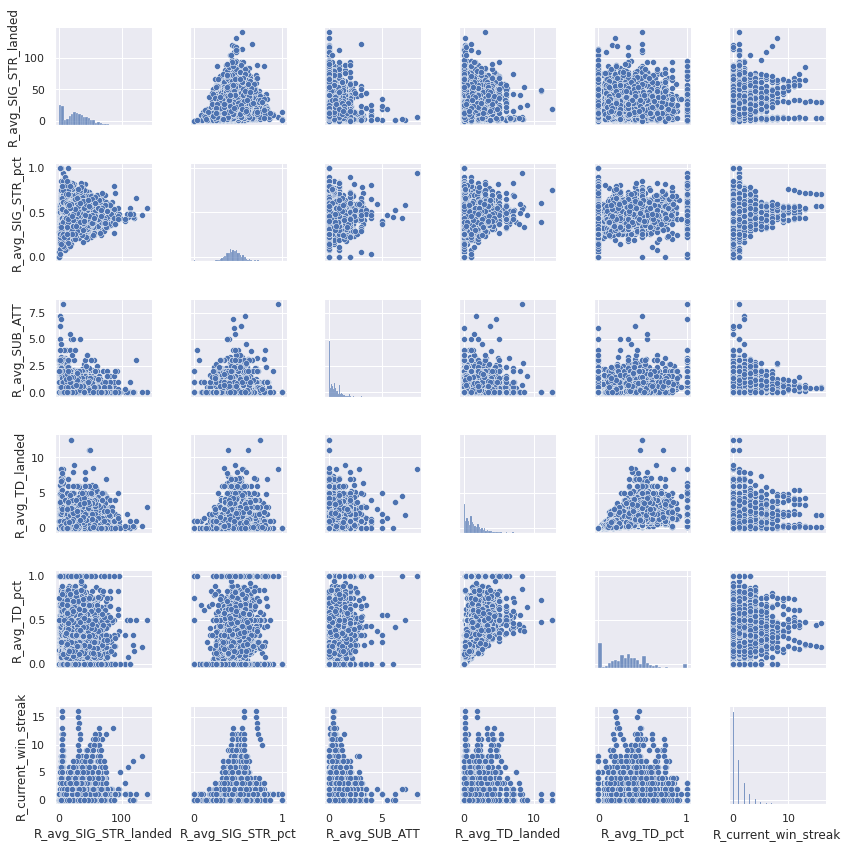

In [16]:
# Scatterplot para as variáveis relacionadas
sns.set()
cols = ['R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct', 'R_current_win_streak'];
sns.pairplot(champs[cols], height = 2);
plt.show();

##**Boxplot**

Boxplot, ou Diagrama de caixa, é uma maneira gráfica de representar a alteração dos dados de uma variável por meio de quartis. É especialmente útil para observar Outliers, que são unidades descrepantes em relação ao restante da distribuição.

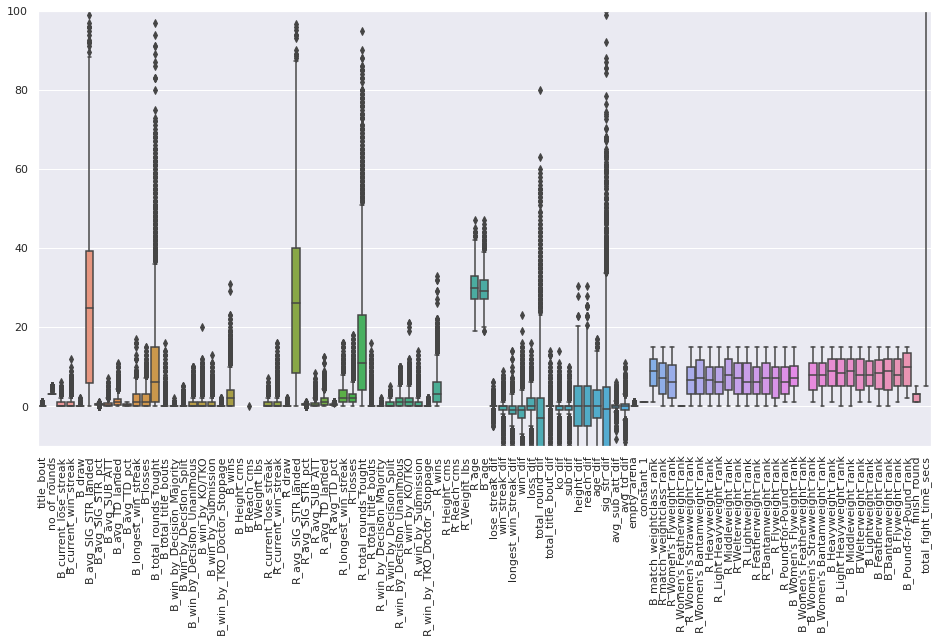

In [17]:
# boxplots
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(data=champs)
fig.axis(ymin=-10, ymax=100);
plt.xticks(rotation=90);

#**Conclusões**
A partir da análise deste dataset, conseguimos identificar quais as estatísticas e aspectos que mais influenciam o resultado da luta, como a eficiência de golpes significativos conectados e o total de rounds ganhos.
Perceba que o controle de espaço no octógono nem aparece nas variáveis.

Muitas pessoas quando assistem uma luta casualmente apenas enchegam o lutador que mais se movimentou, não prestando tanta atenção ao golpes que realmente conectaram.

Confirmamos que a supremacia dos golpes significativos aterrizados é significativa em todas as categorias. E como principal variável para determinar a vitória de um(a) lutador(a).

Se você tem qualquer correção ou sugestão pode me enviar por email: joalisson.contato@gmail.com, ou entrar em contato comigo por qualquer rede social.